In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#load the dataset
data=pd.read_csv("Mall_Customers.csv")
data=data.drop('CustomerID',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [162]:
 # data cleaning
# null and duplicated values
data.isnull().sum()
data.duplicated().sum()

# outlier detection
num_col=data.select_dtypes(include=np.number).columns
z_score=np.abs(zscore(data[num_col]))
outlier=data[(z_score>3).any(axis=1)]

##thare is no null,dupliced values and outliers


In [163]:
# scaling
from sklearn.preprocessing import StandardScaler

num_col=data.select_dtypes(include=np.number).columns
scaler=StandardScaler()
x=scaler.fit_transform(data[num_col])
x=pd.DataFrame(x,columns=num_col)

In [164]:
# encoding
from sklearn.preprocessing import OneHotEncoder

cat_col=pd.get_dummies(data.select_dtypes(include='object'))
cat_col=cat_col.drop('Gender_Female',axis=1)
cat_col['Gender_Male']=cat_col['Gender_Male'].astype(int)
x=pd.concat([x,cat_col],axis=1)

data['Gender']=cat_col

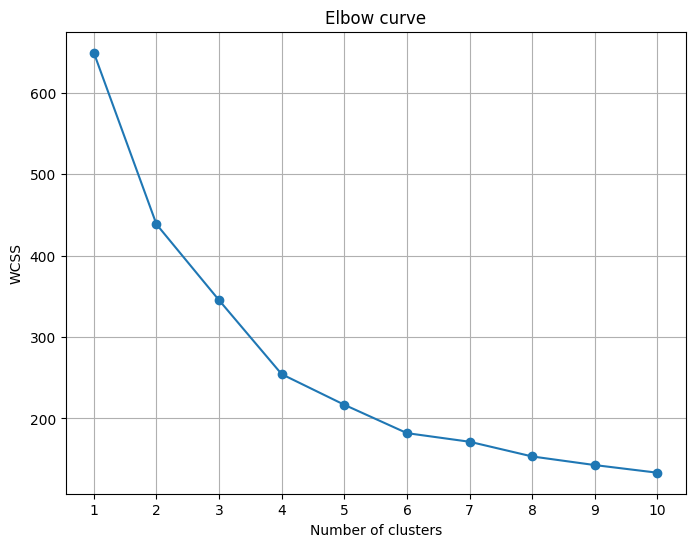

In [165]:
# elbow method for finding the k values
wc=[]
for i in range(1,11):
  kmeans=KMeans(i,random_state=42)
  kmeans.fit(x)
  wc.append(kmeans.inertia_)

# plot the elbow curve
plt.figure(figsize=(8,6))
plt.title('Elbow curve')
plt.plot(range(1,11),wc,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [166]:
# model training
k=5
model=KMeans(k,random_state=42)
model.fit(x)

# get the cluster
cluster=model.predict(x)
data['cluster']=cluster
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,2
1,1,21,15,81,4
2,0,20,16,6,2
3,0,23,16,77,4
4,0,31,17,40,2
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


In [167]:
# summary
summary = data.groupby('cluster').mean()
print(summary)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
cluster                                                                 
0        0.431034  55.551724           48.482759               41.775862
1        0.461538  32.692308           86.538462               82.128205
2        0.340426  27.957447           50.000000               44.638298
3        0.588235  41.264706           88.500000               16.764706
4        0.409091  25.272727           25.727273               79.363636


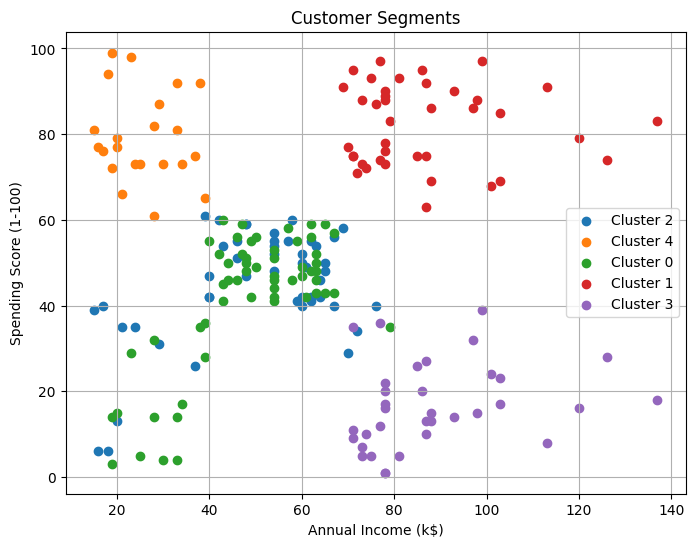

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.grid(True)
plt.show()


In [169]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, model.labels_)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.34977050035201074
